## Bitcoin Price Prediction

### Importing the required Libraries:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the skicit and statsmodels
import statsmodels.formula.api as smf
import sklearn.metrics as sm

In [3]:
# Loading the data the data
df = pd.read_csv('bitcoin_dataset2.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
df.dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


# EDA(Exploratory Data Analysis)

### Let us use jointplots and striplots to analyse the data.
     what is jointplots and striplots?
## jointplots:
     This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

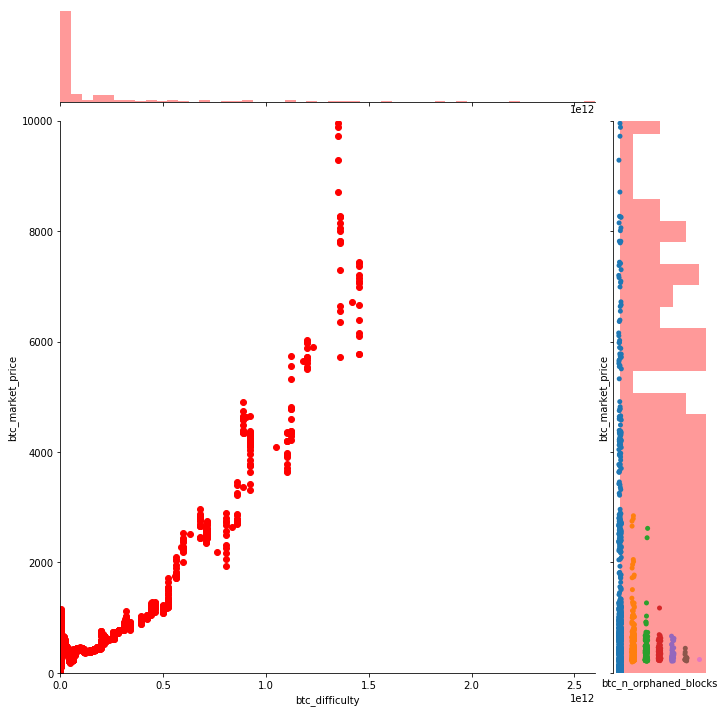

In [22]:
# make the btc_market_price as the default or the target data and make the others to find the value of pearsonr

a = sns.jointplot('btc_difficulty' , 'btc_market_price',
                 data = df , xlim=(0 , 2.6E+12) ,
                 ylim=(0, 10000) ,
                 color='r',
                 size=10)
b = sns.stripplot(x = 'btc_n_orphaned_blocks',
                 y = 'btc_market_price',
                 data = df,
                 jitter=True)

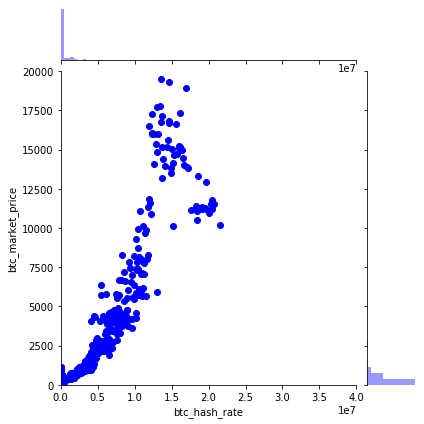

In [37]:
x = sns.jointplot('btc_hash_rate' , 'btc_market_price',
                 data = df , xlim=(0 , 40000000) ,
                 ylim=(0, 20000) ,
                 color='b',)


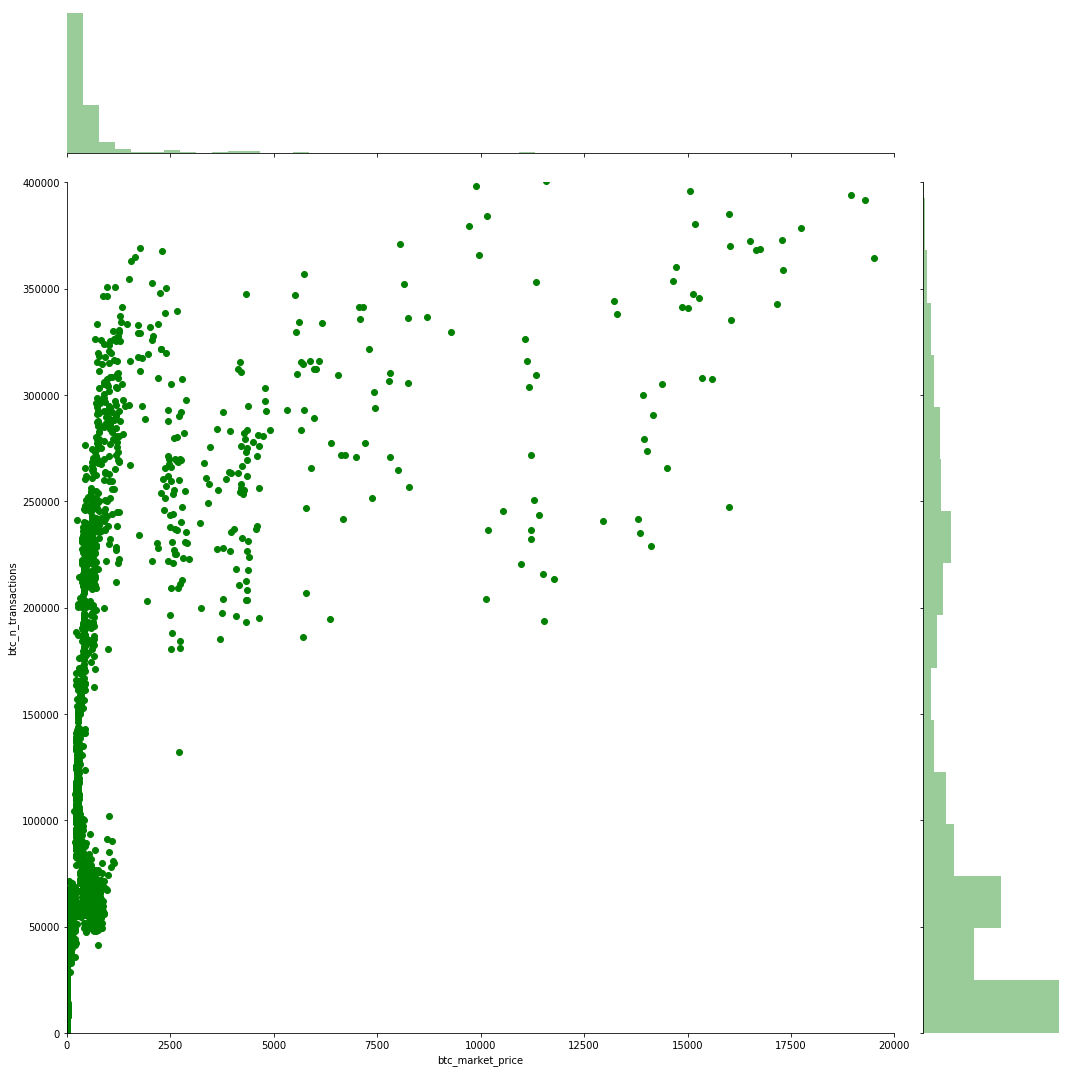

In [45]:
y = b = sns.jointplot("btc_market_price","btc_n_transactions", data=df, ylim=(0, 400000), xlim=(0, 20000), color="g", size=15)

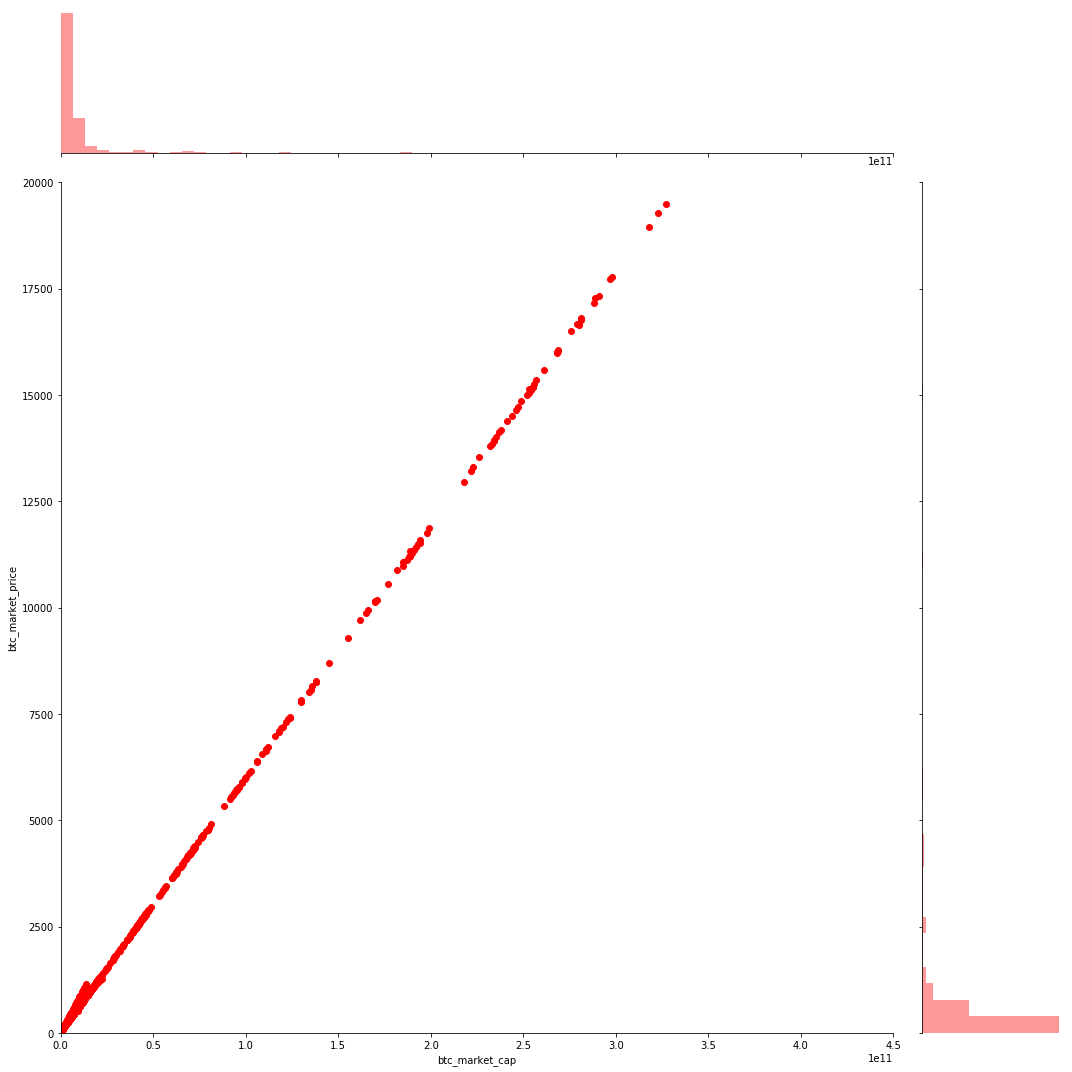

In [46]:
y = sns.jointplot("btc_market_cap", "btc_market_price", data=df, xlim=(0, 450000000000), ylim=(0, 20000), color="r", size=15)

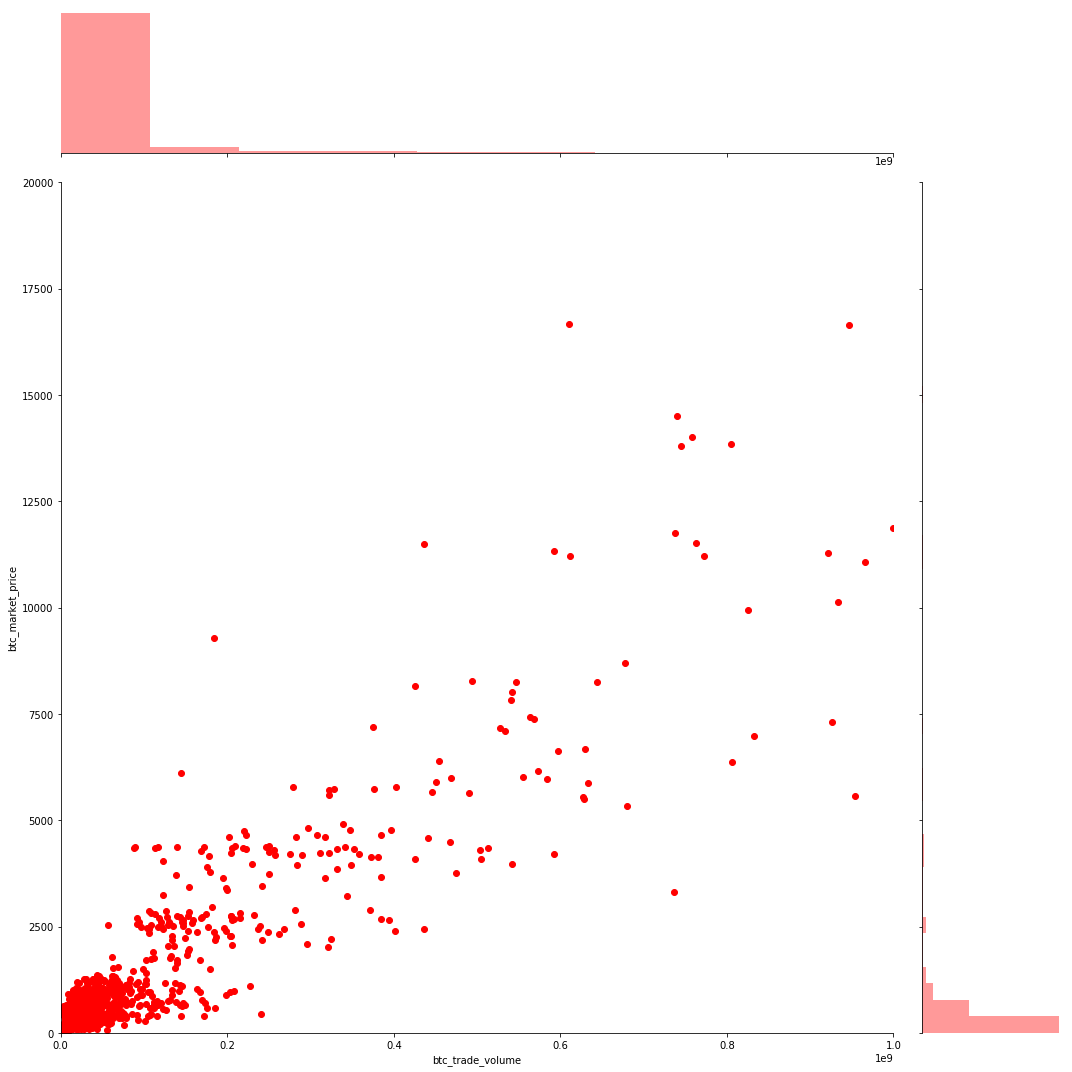

In [48]:
x1 = sns.jointplot("btc_trade_volume", "btc_market_price", data=df, xlim=(0, 1000000000), ylim=(0, 20000), color="r", size=15)

In [ ]:
# From the above graph we come to know that the btc_market_cap and the btc_market_price has the pearsonr value be 1 
# what is pearsonr??
#pearson correlation coefficient and p-value for testing non-correlation.The Pearson correlation coefficient measures the linear relationship between two datasets.
# how to import using scipy library
# scipy.stats.pearsonr

# Cleaning the data

#### The chooing for our prediction willl be the 
     btc_market_price, btc_market_cap, btc_n_transactions, btc_miners_revenue, btc_cost_per_transaction, btc_difficulty, btc_hash_rate, btc_cost_per_transaction_percent

In [ ]:
# many values filled with the NAN values lets clean the data using fillna

In [56]:
# Lets find the how many null values are their in the data
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [57]:
df['btc_trade_volume'].fillna(df['btc_trade_volume'].median(),inplace = True)
df['btc_transaction_fees'].fillna(df['btc_transaction_fees'].median(),inplace = True)
df['btc_difficulty'].fillna(df['btc_difficulty'].mean(),inplace = True)

# Lets Do the Regression:-
     We are going to do the Regression model which helps to predict the certin number of values is this case , it helps to predict the bitcoin , linear regression algorithm in statsmodels, ols (ordinary least sqaure function helps to predict the model)


In [ ]:
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=df).fit()
result = model.fit()
print(result.summary())

### Link to read more about the model
#### https://www.statsmodels.org/dev/example_formulas.html

## Lets Predict the Mean Squared error
#### https://www.statisticshowto.com/mean-squared-error/

### what is MSE?
     The mean squared error is a number that tells you how good a fit your model is. The lesser the value of the MSE, the better the model is. The MSE can be reduced in various manners, such as including all necessary features or using optimizers present in SciKit Learn library(like gradient descent). Here, we'll find the y values and we'll also check the MSE in order to find how good our model

In [68]:
y = model.predict(df[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE value:-", sm.mean_squared_error(y, df['btc_market_price'].values))

MSE value:- 406.61432917838334
